# Sales of summer clothes in E-commerce Wish
Contents

1. Implementation

2. Loading Data

  * Descriptives

3. Data Cleaning

  * Null Values
  * Duplicates

4. Data Preprocessing

  * Reorganization of some columns

5. Exploratory Data Analysis

  * Pandas Profiling
  * Sweetviz

6. Insight Analysis

  * Heatmap
  * Pivot tables
  * Plots and graphs
  * Statictical analysis (t-test)

7. SQL

8. Final Recommendation

# 1.Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="dark", rc=custom_params)
import warnings
import os
import scipy.stats.distributions as dist 
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2- Loading data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Up School/Capstone/ecommerce-data.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
df.shape

(1573, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
round(df.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
price,1573.0,8.0,4.0,1.0,6.0,8.0,11.0,49.0
retail_price,1573.0,23.0,30.0,1.0,7.0,10.0,26.0,252.0
units_sold,1573.0,4339.0,9357.0,1.0,100.0,1000.0,5000.0,100000.0
uses_ad_boosts,1573.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
rating,1573.0,4.0,1.0,1.0,4.0,4.0,4.0,5.0
rating_count,1573.0,890.0,1984.0,0.0,24.0,150.0,855.0,20744.0
rating_five_count,1528.0,442.0,980.0,0.0,12.0,79.0,414.0,11548.0
rating_four_count,1528.0,180.0,401.0,0.0,5.0,32.0,168.0,4152.0
rating_three_count,1528.0,135.0,312.0,0.0,4.0,24.0,129.0,3658.0
rating_two_count,1528.0,64.0,151.0,0.0,2.0,11.0,62.0,2003.0


# 3- Data Cleaning

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

34

In [ ]:
stats.ttest_ind(df[df.duplicated() == True]['units_sold'], df[df.duplicated() == False]['units_sold'])

Ttest_indResult(statistic=-2.3841411928634155, pvalue=0.01723714436449663)

In [ ]:
df[df.duplicated() == True]['units_sold'].mean()

560.5294117647059

In [ ]:
df[df.duplicated() == False]['units_sold'].mean()

4422.480181936322

The reason why there are duplicates in data might be that they highlighted at first then they appeared second time as a result of the search. So, I thought these products might be "popular" than the other ones and are sold more. However, the t-test results showed that there is no significant difference between non-highlighted products and highlighted ones. 

In [ ]:
stats.ttest_ind(df[df.duplicated() == True]['price'], df[df.duplicated() == False]['price'])

Ttest_indResult(statistic=-2.111496596004406, pvalue=0.03488720856509743)

In [ ]:
stats.ttest_ind(df[df.duplicated() == True]['retail_price'], df[df.duplicated() == False]['retail_price'])

Ttest_indResult(statistic=-0.25015478183951656, pvalue=0.8025003601347656)

In [ ]:
stats.ttest_ind(df[df.duplicated() == True]['shipping_is_express'], df[df.duplicated() == False]['shipping_is_express'])

Ttest_indResult(statistic=-0.2974671383146946, pvalue=0.7661492220674688)

I thought it might be because the highlighted products are significantly more expensive than other products. However, there is no such evidence for that. Duplicates might be occurred due to technical reasons than promotion or the consumers might not be paying attention to highlighted products.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1539, 43)

In [ ]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [ ]:
null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)

,null_val,percent_
merchant_profile_picture,1314,85.0
has_urgency_banner,1071,70.0
urgency_text,1071,70.0
rating_two_count,43,3.0
product_color,41,3.0
rating_five_count,43,3.0
rating_four_count,43,3.0
rating_three_count,43,3.0
rating_one_count,43,3.0
origin_country,16,1.0


In [ ]:
df[df['urgency_text'].isnull()== False]['urgency_text'].unique()

array(['Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

Translations: "Réduction sur les achats en gros": Discount on wholesale purchases (in French);
                  "Quantité limitée !": Limited Quantity (in French)

In [ ]:
df[(df['has_urgency_banner'].isnull()== False)]['has_urgency_banner']

0       1.0
1       1.0
2       1.0
4       1.0
8       1.0
       ... 
1558    1.0
1561    1.0
1564    1.0
1565    1.0
1569    1.0
Name: has_urgency_banner, Length: 468, dtype: float64

In [ ]:
df[(df['has_urgency_banner'].isnull()== False)]['has_urgency_banner'].unique()

array([1.])

We saw that all values that is not null are 1. So, there is a possibility that the products with no urgency banner is labeled as None. If so, maybe we can find a difference between the items with urgency banner and others.

In [ ]:
stats.ttest_ind(df[df['has_urgency_banner'] == 1.0]['units_sold'], df[df['has_urgency_banner'] != 1.0]['units_sold'] )

Ttest_indResult(statistic=-1.1085893506514295, pvalue=0.2677808101454223)

As t-test indicated, there is no significant difference between the products with urgency banner and the product with no urgency banner specified. Further research need to be done to investigate the influence of urgency banner

In [ ]:
df.drop(['urgency_text','merchant_profile_picture','has_urgency_banner'], axis = 1, inplace=True)

In [ ]:
df.isnull().sum()

title                            0
title_orig                       0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count               43
rating_four_count               43
rating_three_count              43
rating_two_count                43
rating_one_count                43
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  16
merchant_title      

In [ ]:
df[df['product_variation_size_id'].isnull()].index.tolist()

[44, 116, 338, 404, 584, 637, 726, 856, 954, 1179, 1296, 1385, 1440, 1474]

In [ ]:
df[df['origin_country'].isnull()].index.tolist()

[56,
 180,
 498,
 507,
 547,
 632,
 679,
 802,
 921,
 943,
 1059,
 1147,
 1244,
 1256,
 1289,
 1296]

In [ ]:
df[df['merchant_name'].isnull()].index.tolist()

[408, 1103, 1350]

In [ ]:
df[df['merchant_info_subtitle'].isnull()].index.tolist()

[438]

In [ ]:
df[df['rating_five_count'].isnull()].index.tolist() == df[df['rating_four_count'].isnull()].index.tolist()

True

In [ ]:
df[df['rating_four_count'].isnull()].index.tolist() == df[df['rating_three_count'].isnull()].index.tolist()

True

In [ ]:
df[df['rating_three_count'].isnull()].index.tolist() == df[df['rating_two_count'].isnull()].index.tolist()

True

In [ ]:
df[df['rating_two_count'].isnull()].index.tolist() == df[df['rating_one_count'].isnull()].index.tolist()

True

In [ ]:
df.dropna(inplace=True)
df.shape

(1427, 40)

In [ ]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

title :  1119
title_orig :  1121
price :  117
retail_price :  101
currency_buyer :  1
units_sold :  11
uses_ad_boosts :  2
rating :  188
rating_count :  726
rating_five_count :  579
rating_four_count :  425
rating_three_count :  369
rating_two_count :  249
rating_one_count :  316
badges_count :  3
badge_local_product :  2
badge_product_quality :  2
badge_fast_shipping :  2
tags :  1146
product_color :  98
product_variation_size_id :  90
product_variation_inventory :  48
shipping_option_name :  14
shipping_option_price :  8
shipping_is_express :  2
countries_shipped_to :  92
inventory_total :  8
origin_country :  5
merchant_title :  888
merchant_name :  888
merchant_info_subtitle :  980
merchant_rating_count :  854
merchant_rating :  883
merchant_id :  888
merchant_has_profile_picture :  2
product_url :  1243
product_picture :  1243
product_id :  1243
theme :  1
crawl_month :  1


In [ ]:
round(df.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
price,1427.0,8.0,4.0,1.0,6.0,8.0,11.0,49.0
retail_price,1427.0,23.0,31.0,1.0,7.0,10.0,26.0,252.0
units_sold,1427.0,4417.0,9112.0,2.0,100.0,1000.0,5000.0,100000.0
uses_ad_boosts,1427.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
rating,1427.0,4.0,0.0,1.0,4.0,4.0,4.0,5.0
rating_count,1427.0,903.0,1945.0,1.0,28.0,181.0,894.0,20744.0
rating_five_count,1427.0,439.0,965.0,0.0,13.0,84.0,418.0,11548.0
rating_four_count,1427.0,178.0,391.0,0.0,5.0,33.0,170.0,4152.0
rating_three_count,1427.0,132.0,298.0,0.0,4.0,26.0,134.0,3658.0
rating_two_count,1427.0,62.0,141.0,0.0,2.0,12.0,64.0,2003.0


In [ ]:
df.shape

(1427, 40)

# 4- Data Preprocessing

4.1. Size variation

In [ ]:
pr_var = df['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               600
XS              319
M               190
XXS              86
L                48
XL               17
XXL              15
S.               15
XXXS              6
s                 5
Size S            5
4XL               5
XS.               5
M.                4
2XL               4
SIZE XS           4
Size-S            3
Size-XS           3
33                3
34                3
2pcs              3
SizeL             2
SIZE-XXS          2
One Size          2
3XL               2
35                2
5XL               2
Size -XXS         2
XXXXXL            2
Size S.           2
S(bust 88cm)      2
29                2
Size4XL           2
Suit-S            2
size S            2
EU 35             2
Name: product_variation_size_id, dtype: int64

In [ ]:
pr_var[pr_var == 1]

Women Size 37                   1
4                               1
SIZE S                          1
20PCS-10PAIRS                   1
Size-5XL                        1
30 cm                           1
Size-XXS                        1
25                              1
1                               1
60                              1
100 cm                          1
100 x 100cm(39.3 x 39.3inch)    1
EU39(US8)                       1
S..                             1
32/L                            1
1 PC - XL                       1
S (waist58-62cm)                1
Size M                          1
25-S                            1
first  generation               1
Women Size 36                   1
5PAIRS                          1
40 cm                           1
36                              1
Size XXS                        1
XXXL                            1
S/M(child)                      1
choose a size                   1
4-5 Years                       1
1m by 3m      

In [ ]:
# XXS
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size -XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XXS', 'XXS')

# XS
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XS.', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XS', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE XS', 'XS')

# S
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('s', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size/S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size--S ', 'S')

# M
df['product_variation_size_id'] = df['product_variation_size_id'].replace('M.', 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size M', 'M')

# L
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('L.', 'L')

# XXL
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL', 'XXL')

# Plus size
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size4XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('5XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXXXL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-5XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXXL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-4XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('6XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXL', '3XL<=')

In [ ]:
pr_var = df['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               634
XS              331
M               195
XXS              91
L                51
XXL              19
XL               17
3XL<=            16
XXXS              6
33                3
34                3
2pcs              3
One Size          2
3XL               2
EU 35             2
S(bust 88cm)      2
29                2
35                2
Suit-S            2
Name: product_variation_size_id, dtype: int64

In [ ]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == '3XL <=':
        return name
    else:
        return "OTHER"
    
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'OTHER')
df['product_variation_size_id'] = df['product_variation_size_id'].apply(pr_var)

In [ ]:
len(df[df['product_variation_size_id'] == 'OTHER']) / len(df)

0.05816398037841626

About 6% of size id is remained unidentified. 

4.2. Color variation

In [ ]:
pr_colr = df['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               282
white               226
pink                 97
yellow               94
blue                 93
red                  90
green                82
grey                 68
purple               50
armygreen            30
winered              27
navyblue             27
orange               25
multicolor           20
beige                13
lightblue            12
khaki                11
white & green        10
gray                  9
rosered               8
brown                 7
coffee                6
skyblue               6
darkblue              6
rose                  5
floral                5
black & green         4
leopard               4
camouflage            3
fluorescentgreen      3
orange-red            3
Black                 3
black & white         3
lightpink             3
White                 3
lightgreen            3
Name: product_color, dtype: int64

In [ ]:
pr_colr[pr_colr == 2]

whitefloral       2
lightyellow       2
pink & blue       2
watermelonred     2
lightred          2
dustypink         2
navy              2
applegreen        2
pink & white      2
white & black     2
pink & grey       2
navy blue         2
lakeblue          2
Pink              2
pink & black      2
coolblack         2
burgundy          2
Army green        2
black & yellow    2
wine              2
black & blue      2
camel             2
mintgreen         2
apricot           2
Name: product_color, dtype: int64

In [ ]:
pr_colr[pr_colr == 1]

brown & yellow         1
violet                 1
silver                 1
red & blue             1
leopardprint           1
lightgrey              1
army                   1
coralred               1
offwhite               1
lightpurple            1
navyblue & white       1
light green            1
lightgray              1
whitestripe            1
denimblue              1
star                   1
prussianblue           1
gray & white           1
nude                   1
Blue                   1
blue & pink            1
rainbow                1
black & stripe         1
gold                   1
orange & camouflage    1
offblack               1
wine red               1
greysnakeskinprint     1
rosegold               1
winered & yellow       1
RED                    1
claret                 1
jasper                 1
army green             1
ivory                  1
white & red            1
lightkhaki             1
Rose red               1
Name: product_color, dtype: int64

In [ ]:
df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('White', 'white')

df['product_color'] = df['product_color'].replace('navyblue', 'blue')
df['product_color'] = df['product_color'].replace('lightblue', 'blue')
df['product_color'] = df['product_color'].replace('skyblue', 'blue')
df['product_color'] = df['product_color'].replace('darkblue', 'blue')
df['product_color'] = df['product_color'].replace('navy', 'blue')

df['product_color'] = df['product_color'].replace('winered', 'red')
df['product_color'] = df['product_color'].replace('rosered', 'red')
df['product_color'] = df['product_color'].replace('rose', 'red')
df['product_color'] = df['product_color'].replace('RED', 'red')
df['product_color'] = df['product_color'].replace('Rose red', 'red')
df['product_color'] = df['product_color'].replace('wine red', 'red')

df['product_color'] = df['product_color'].replace('lightpink', 'pink')

df['product_color'] = df['product_color'].replace('armygreen', 'green')
df['product_color'] = df['product_color'].replace('khaki', 'green')
df['product_color'] = df['product_color'].replace('lightgreen', 'green')
df['product_color'] = df['product_color'].replace('fluorescentgreen', 'green')

df['product_color'] = df['product_color'].replace('gray', 'grey')

df['product_color'] = df['product_color'].replace('coffee', 'brown')

df['product_color'] = df['product_color'].replace('white & green', 'dual')
df['product_color'] = df['product_color'].replace('black & green', 'dual')
df['product_color'] = df['product_color'].replace('black & white', 'dual')
df['product_color'] = df['product_color'].replace('pink & white', 'dual')
df['product_color'] = df['product_color'].replace('pink & grey', 'dual')
df['product_color'] = df['product_color'].replace('black & yellow', 'dual')
df['product_color'] = df['product_color'].replace('pink & blue', 'dual')
df['product_color'] = df['product_color'].replace('black & blue', 'dual')
df['product_color'] = df['product_color'].replace('white & black', 'dual')
df['product_color'] = df['product_color'].replace('pink & black', 'dual')
df['product_color'] = df['product_color'].replace('brown & yellow', 'dual')
df['product_color'] = df['product_color'].replace('gray & white', 'dual')
df['product_color'] = df['product_color'].replace('winered & yellow', 'dual')
df['product_color'] = df['product_color'].replace('navyblue & white', 'dual')
df['product_color'] = df['product_color'].replace('red & blue', 'dual')
df['product_color'] = df['product_color'].replace('blue & pink', 'dual')
df['product_color'] = df['product_color'].replace('white & red', 'dual')

In [ ]:
pr_colr = df['product_color'].value_counts()
pr_colr[pr_colr > 2]

black         285
white         229
blue          146
red           133
green         129
pink          100
yellow         94
grey           77
purple         50
dual           38
orange         25
multicolor     20
beige          13
brown          13
floral          5
leopard         4
orange-red      3
camouflage      3
Name: product_color, dtype: int64

# 5- EDA

Pandas Profiling and Sweetviz: https://colab.research.google.com/drive/1SoqalxxwKm6pz8AikiLoi965k43kOSJg?usp=sharing 

# 6- Insight Analysis

**Title - Original Title Difference**

In [ ]:
title_same = df[df['title'] == df['title_orig']]
title_diff = df[df['title'] != df['title_orig']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



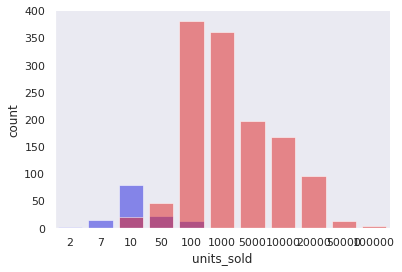

In [ ]:
sns.countplot(title_same['units_sold'], color='blue', alpha=0.5)
sns.countplot(title_diff['units_sold'], color='red', alpha=0.5)

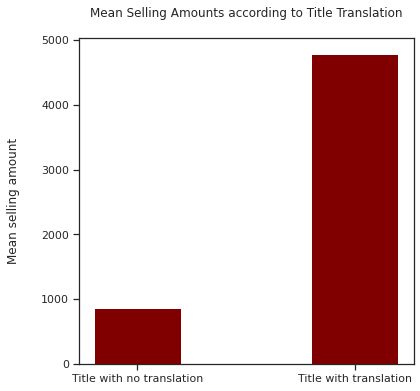

In [ ]:
sns.set_style('ticks')
data = {'Title with no translation':863.65, 'Title with translation':4785.51}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Mean selling amount",labelpad=21)
plt.title("Mean Selling Amounts according to Title Translation",pad=21)
plt.show()

About title and title_orig difference: we might suppose that a product might sell better if it has a translation in the client's preferred language. And if a product is available and translated to more countries and languages, the market would be larger. This in turn might lead to more sales. 

In [ ]:
stats.ttest_ind(title_same['units_sold'], title_diff['units_sold'])

Ttest_indResult(statistic=-4.778860737614157, pvalue=1.945116481023805e-06)

In [ ]:
title_same['units_sold'].mean()

863.6567164179105

In [ ]:
title_diff['units_sold'].mean()

4785.513534416086

According to the results, the products with translated titles are significantly sold more than the products with no translations. Language barrier affect how much the product sold. Products with translated title may be reassuring the consumer or the consumers may overlook the products with no translated titles.

**Shipping Options**

In [ ]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard'],
      dtype=object)

In [ ]:
df.groupby('shipping_option_name')['units_sold'].sum()

shipping_option_name
Envio Padrão                 22200
Envío normal                 16100
Expediere Standard            2400
Livraison Express              200
Livraison standard         6101049
Spedizione standard           1100
Standard Shipping            87550
Standardowa wysyłka          30100
Standardversand                300
Standart Gönderi             11000
Стандартная доставка         10100
الشحن القياسي                 1300
การส่งสินค้ามาตรฐาน          10000
ការដឹកជញ្ជូនតាមស្តង់ដារ      10000
Name: units_sold, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6016 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6070 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6042 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6026 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6073 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6023 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 6025 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backe

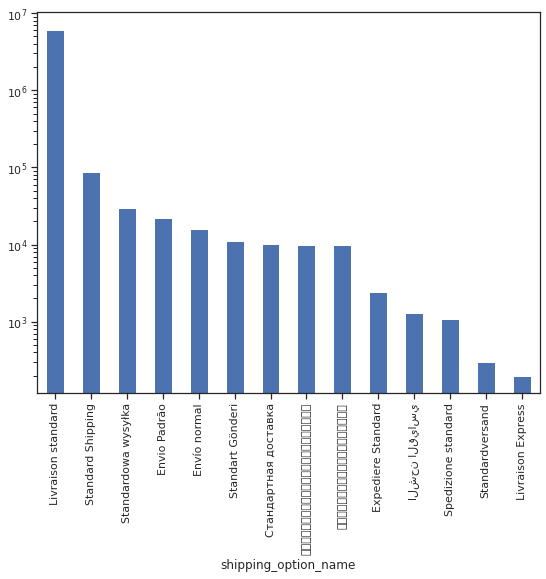

In [ ]:
plt.figure(figsize=(9,7))
plt.yscale('log')
df.groupby('shipping_option_name')['units_sold'].sum().sort_values(ascending = False).plot(kind= 'bar')

For most of the merchants, there is no translation to French in shipping options. When we look at the bar graph, we see that majority of the products sold has shipping option name in French. So, as in the case of titles, language barrier may affect the sales. It might be better to have a translation option to increase the satisfaction of user experience. 

**Popular product tags in Summer - 2020**

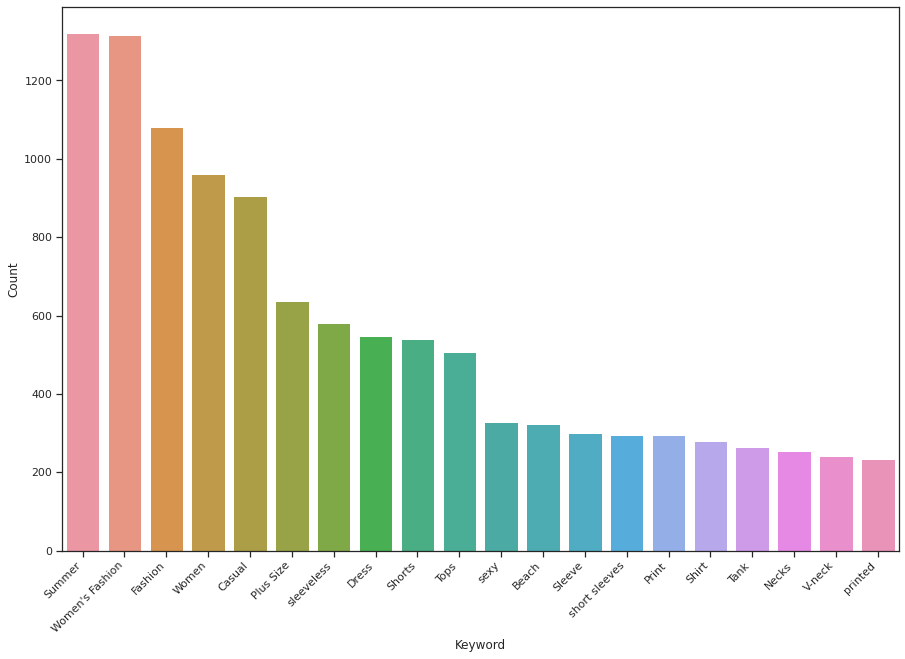

In [ ]:
unique_tags = pd.read_csv('/content/drive/My Drive/Up School/Capstone/unique-categories.sorted-by-count.csv')

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'keyword',
            y = 'count',
            data = unique_tags.iloc[:20],
            ax = ax)
ax.set(xlabel='Keyword', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Since there is a drastic decrease after tenth item. I take the first 10 words as popular tags.

In [ ]:
# a column which indicates how many popular tags contain on a specific product tag
pop_tags = unique_tags.iloc[:10]['keyword'].tolist()

def check_tag_quality(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    
    common_elements = np.intersect1d(pop_tags, prod_tags)
    return len(common_elements) / len(pop_tags)
    
df['tag_quality'] = df['tags'].apply(check_tag_quality)
# the more the tag quality is, the more the product has popular tags.

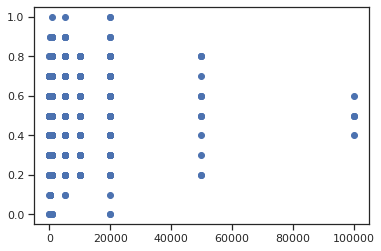

In [ ]:
plt.scatter(df['units_sold'], df['tag_quality'])

In [ ]:
# the number of tags include in the product
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
df['tag_count'] = df['tags'].apply(tag_count)

In [ ]:
def check_rating_prop(s_count,t_count):
    if s_count == 0:
        return 0
    else:
        return s_count/t_count
    
df['rating_five_count'] = df.apply(lambda x: check_rating_prop(x.rating_five_count, x.rating_count), 
                                             axis = 1)
df['rating_four_count'] = df.apply(lambda x: check_rating_prop(x.rating_four_count, x.rating_count), 
                                             axis = 1)
df['rating_three_count'] = df.apply(lambda x: check_rating_prop(x.rating_three_count, x.rating_count), 
                                             axis = 1)
df['rating_two_count'] = df.apply(lambda x: check_rating_prop(x.rating_two_count, x.rating_count), 
                                             axis = 1)
df['rating_one_count'] = df.apply(lambda x: check_rating_prop(x.rating_one_count, x.rating_count), 
                                             axis = 1)

In [ ]:
def check_dis_per(r_price,buyer_price):
    return (r_price - buyer_price) / r_price
    
df['discount_rate'] = df.apply(lambda x: check_dis_per(x.retail_price, x.price),
                                             axis = 1)

In [ ]:
# whether the title was localised or not
def is_localised(trans,origi):
    if trans == origi:
        return 0
    else:
        return 1
    
df['title_localised'] = df.apply(lambda x: is_localised(x.title, x.title_orig), axis = 1)

In [ ]:
def merchant_pop_on_prod(m_count,p_count):
    if m_count == 0:
        return 0
    else:
        return p_count / m_count
    
df['merch_pop_proc'] = df.apply(lambda x: merchant_pop_on_prod(x.merchant_rating_count, x.rating_count),
                                              axis = 1)

**Heatmap**

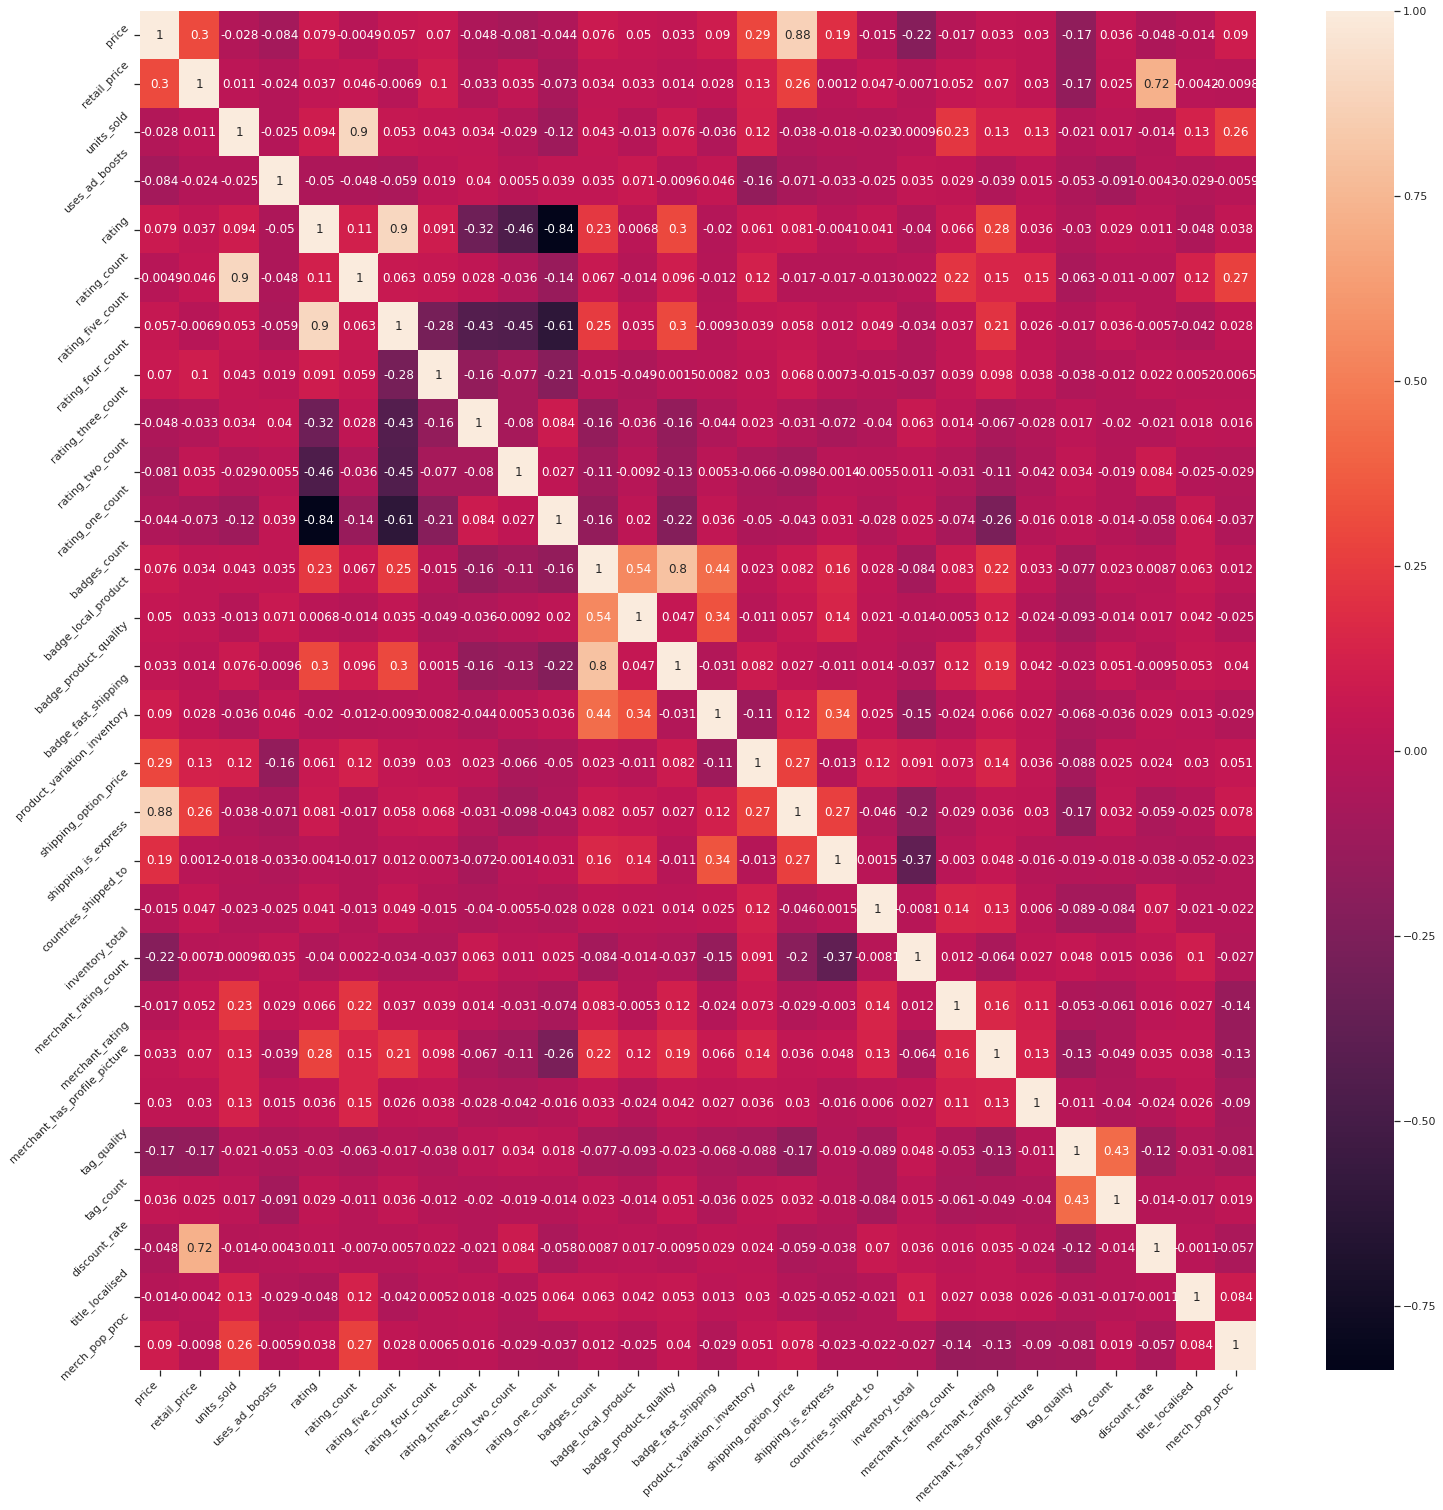

In [ ]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),
            annot=True,
            ax=ax)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

**Size Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



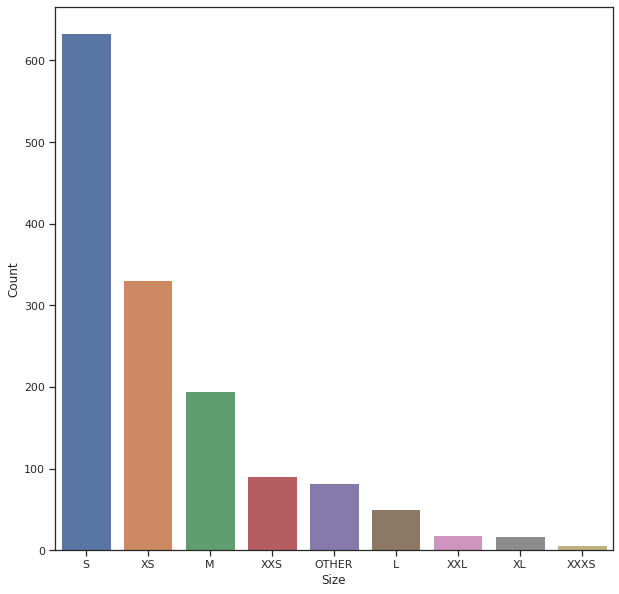

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = df['product_variation_size_id'].value_counts().index,
              data = df,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

In [ ]:
df.pivot_table('units_sold','product_variation_size_id').sort_values(by='units_sold', ascending=False)

,units_sold
product_variation_size_id,
XL,8100.000000
M,7045.728205
L,5946.078431
S,4922.022082
OTHER,3076.867470
XS,2679.788520
XXL,2250.526316
XXS,1992.527473
XXXS,250.000000


<Figure size 648x504 with 0 Axes>

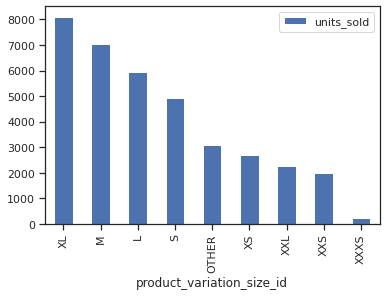

In [ ]:
plt.figure(figsize=(9,7))
df.pivot_table('units_sold','product_variation_size_id').sort_values(by='units_sold', ascending=False).plot(kind='bar')

Since product_variation_size_id column reflects only representation of one of the sizes, it would be wrong to make inferences out of it.

**Color Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



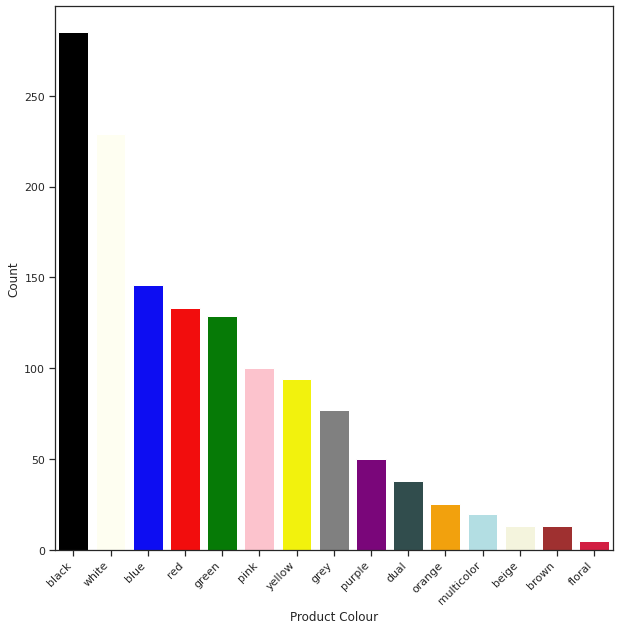

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
clrs = ['black', 'ivory', 'blue', 'red', 'green', 'pink', 'yellow','grey','purple','darkslategrey','orange','powderblue','beige','brown','crimson']
sns.countplot('product_color',
              data = df,
              order = df['product_color'].value_counts().iloc[:15].index,
              ax = ax, palette=clrs,saturation=0.90)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

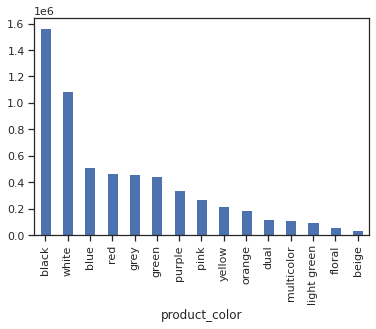

In [ ]:
df.groupby('product_color')['units_sold'].sum().sort_values(ascending = False)[:15].plot(kind='bar')

Same with product_variation_size_id, product_color only shows one of the color of that product so we cannot make inference looking at that column.

**Price - Retail price**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



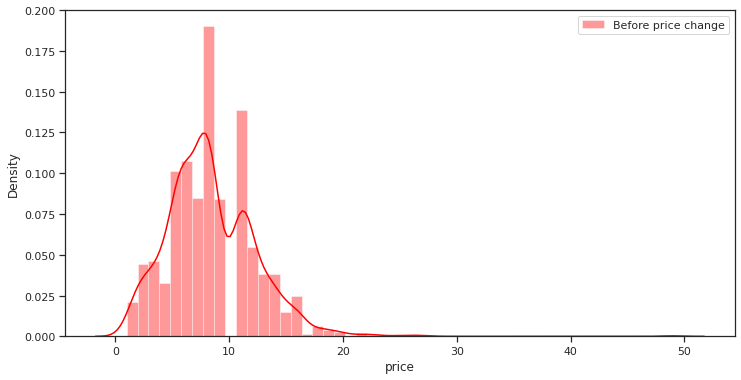

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(12,6))
sns.distplot(df['price'], color='red', label='Before price change')
plt.legend()

In [ ]:
df[(df['price'] < 11) & (df['price'] > 9)]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month,tag_quality,tag_count,discount_rate,title_localised,merch_pop_proc


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



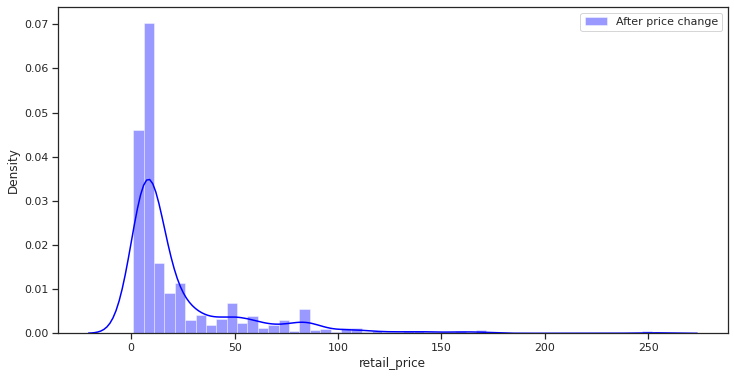

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['retail_price'], color='blue', label='After price change')
plt.legend()

In [ ]:
len(df[df['retail_price'] > df['price']])

736

In [ ]:
len(df[df['retail_price'] <= df['price']])

691

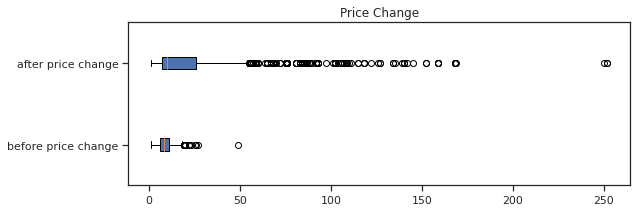

In [ ]:
all_data = [df["price"], df["retail_price"]]
labels = ['before price change', 'after price change']

#MultipleBoxplot
plt.figure(figsize=(9,3))
plt.boxplot(all_data, vert=False, patch_artist=True, labels=labels) 
plt.title('Price Change')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



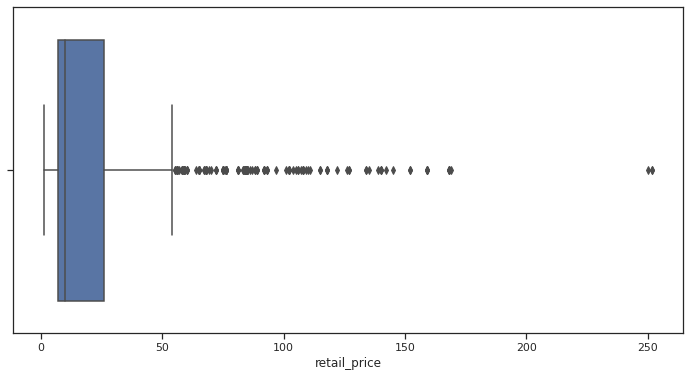

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df["retail_price"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



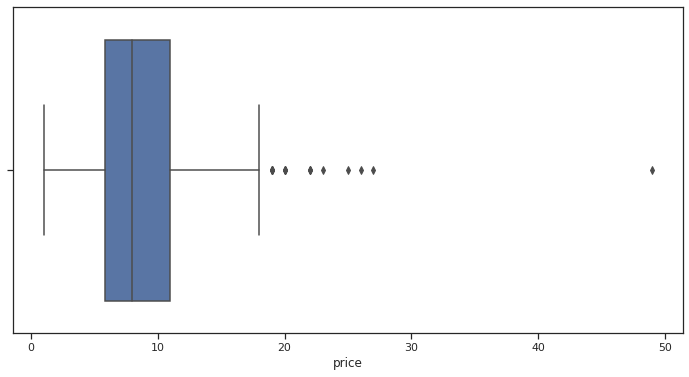

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df["price"])

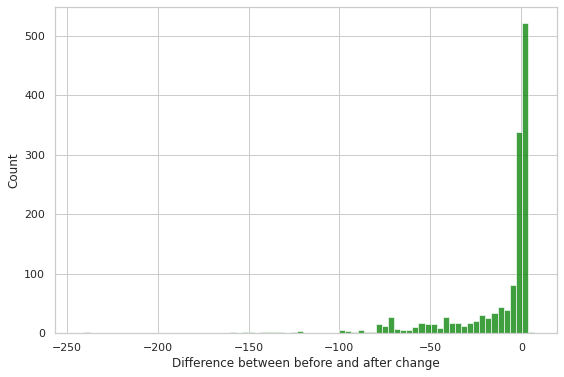

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.histplot(df['price'] - df['retail_price'], color='green')
plt.xlabel('Difference between before and after change');

Some retail_price are higher than normal price: During the SARS-CoV-2 (i.e. COVID) pandemic, many sellers around the world decided raise their prices due to the shortage of supply. Since the dataset was fetched during august 2020 (with all the concerns related to the COVID), it might be that some sellers went from a previous regular price A to a special covid price B higher than price A.

In [ ]:
price_higher = df[(df['price'] - df['retail_price']) < 0]
price_lower = df[(df['price'] - df['retail_price']) >= 0]

In [ ]:
stats.ttest_ind(price_higher['units_sold'], price_lower['units_sold'])

Ttest_indResult(statistic=-1.27683890294103, pvalue=0.2018671500127621)

In [ ]:
print(price_higher['units_sold'].mean(), price_lower['units_sold'].mean())

4118.881793478261 4735.024602026049


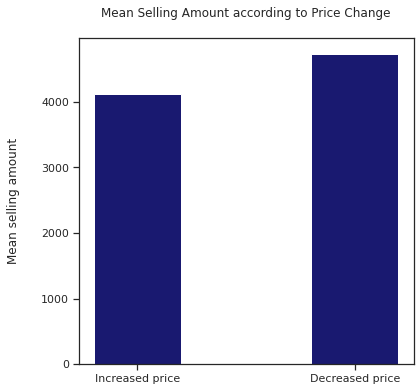

In [ ]:
sns.set_style('ticks')
data = {'Increased price':4118.88, 'Decreased price':4735.02}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='midnightblue',
        width = 0.4)
 
plt.ylabel("Mean selling amount",labelpad=21)
plt.title("Mean Selling Amount according to Price Change", pad=21)
plt.show()

I presumed that the products that are higher than before might have sold less than discounted products. However, the results indicated that there is no particular difference between these two groups. It might be because products with increasing prices are essentials for a person, and the increased prices does not have an affect on their selling rates. Besides, mechants may specifically increased the prices of more essential products, knowing the fact that comsumers will buy anyway. 

In [ ]:
stats.ttest_ind(price_higher['countries_shipped_to'], price_lower['countries_shipped_to'])

Ttest_indResult(statistic=2.3428689048373625, pvalue=0.01927305559548124)

In [ ]:
print(price_higher['countries_shipped_to'].mean(), price_lower['countries_shipped_to'].mean())

41.411684782608695 38.97829232995659


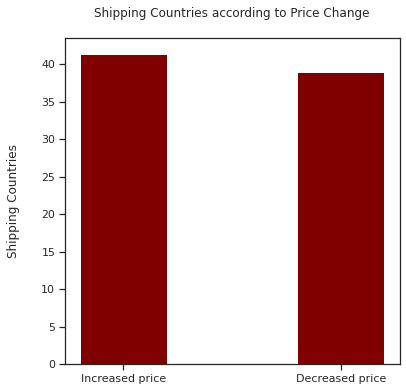

In [ ]:
data = {'Increased price':41.41, 'Decreased price':38.97}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Shipping Countries",labelpad=21)
plt.title("Shipping Countries according to Price Change",pad=21)
plt.show()

Products with increasing prices relatively has wider range of shipping countries than products with decreasing prices. It is possible that the disruptions experienced in transportation between countries during the Covid period were also reflected in the prices.

In [ ]:
df['origin_country'].unique()

array(['CN', 'VE', 'US', 'SG', 'GB'], dtype=object)

In [ ]:
price_higher['origin_country'].unique()

array(['CN', 'US', 'VE', 'SG'], dtype=object)

In [ ]:
price_lower['origin_country'].unique()

array(['CN', 'VE', 'US', 'GB'], dtype=object)

In [ ]:
price_lower[price_lower['origin_country'] == 'GB']['countries_shipped_to']

1325    45
Name: countries_shipped_to, dtype: int64

In [ ]:
price_higher[price_higher['origin_country'] == 'SG']['countries_shipped_to']

483    20
566    20
Name: countries_shipped_to, dtype: int64

From three out of five origin countries of the products, there is no difference in terms of price change. However, the retail prices of all products from Singapore has increased compared to previous prices. On the other hand, the retail prices of all products from Great Britain has decreased compared to previous prices. However, there are only 3 products from Great Britain and Singapore.

**Origin Country**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Amount of product')

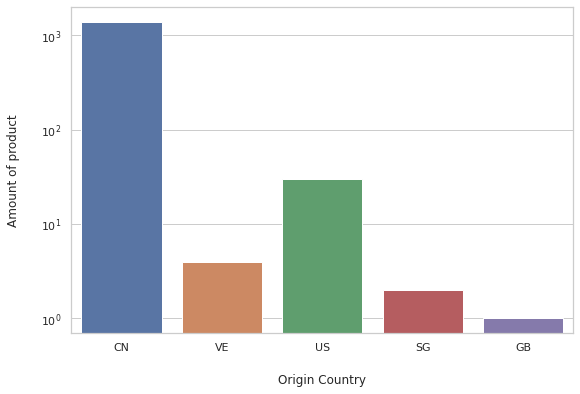

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
plt.yscale('log')
sns.countplot(df['origin_country'])
plt.xlabel('Origin Country', labelpad=21)
plt.ylabel('Amount of product', labelpad=21)

The reason why most of the products are from Canada might be because of the trade agreement that France and Canada made in 2017.Canadian and French businesses and citizens have benefited from the provisional entry into force of the Comprehensive Economic and Trade Agreement (CETA), between Canada and the European Union, which aims to reduce the costs of goods by eliminating tariffs, to increase mobility of people and to intensify trade in goods and services.

In trade of goods, France remained Canada's ninth-largest global partner in 2020

https://www.canadainternational.gc.ca/france/bilateral_relations_bilaterales/canada_france_comm.aspx?lang=eng 

**Units_sold**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



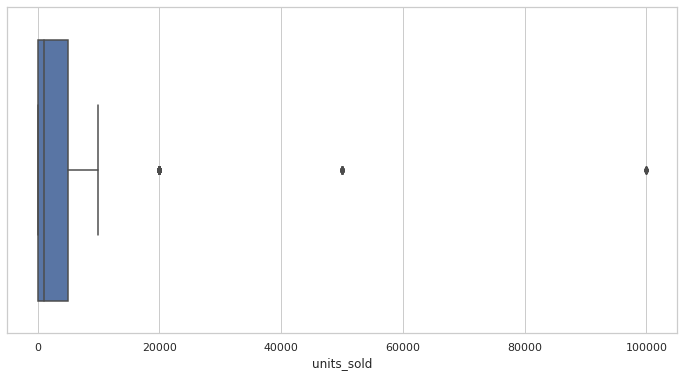

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df["units_sold"])

**Units_sold - Fast Shipping**

In [ ]:
fast_shipping = df[(df['badge_fast_shipping'] == 1) | (df['shipping_is_express'] == 1) | (df['shipping_option_name'] == 'Livraison Express')]
normal_shipping = df[~((df['badge_fast_shipping'] == 1) & (df['shipping_is_express'] == 1) & (df['shipping_option_name'] == 'Livraison Express'))]

In [ ]:
stats.ttest_ind(fast_shipping['units_sold'], normal_shipping['units_sold'])

Ttest_indResult(statistic=-1.3514265065861613, pvalue=0.17677110964267345)

In [ ]:
print(fast_shipping['units_sold'].mean(), normal_shipping['units_sold'].mean())

1429.4117647058824 4423.2975438596495


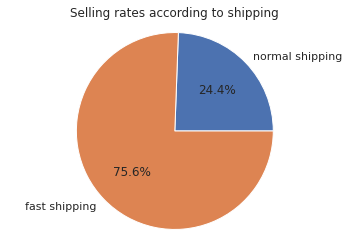

In [ ]:
my_data = [fast_shipping['units_sold'].mean(), normal_shipping['units_sold'].mean()]
my_labels = 'normal shipping','fast shipping'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Selling rates according to shipping')
plt.axis('equal')
plt.show()

Products with fast shipping option are sold three times higher than products with standard shipping. According to research on a popular e-commerce site, 98 percent of consumers prefer products with fast shipping options. These results are consistent with our findings.

**Units_sold - Price**

In [ ]:
px.scatter(df, x='units_sold', y='price',marginal_x='box', title='Price vs Units Sold')

In [ ]:
price = pd.cut(df['price'],[8.5,9.5,10.5,11.5])
df.pivot_table('units_sold',price)

,units_sold
price,
"(8.5, 9.5]",5633.478261
"(10.5, 11.5]",4021.484211


In [ ]:
stats.ttest_ind(df[(df['price'] < 9.5) & (df['price'] > 8.5)]['units_sold'], df[(df['price'] < 11.5) & (df['price'] > 10.5)]['units_sold'])

Ttest_indResult(statistic=1.818291964381333, pvalue=0.0700067814175709)

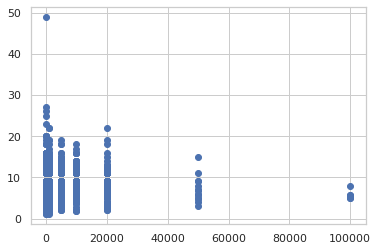

In [ ]:
plt.scatter(df['units_sold'], df['price'])

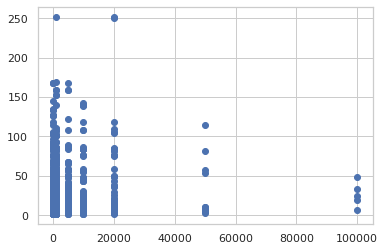

In [ ]:
plt.scatter(df['units_sold'], df['retail_price'])

Products with more affordable prices sold more than expensive ones

**Units_sold - Rating_count**

In [ ]:
df.pivot_table('units_sold','rating_count')

,units_sold
rating_count,
1,46.187500
2,63.846154
3,58.421053
4,64.814815
5,147.272727
...,...
14568,50000.000000
17444,50000.000000
17980,100000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



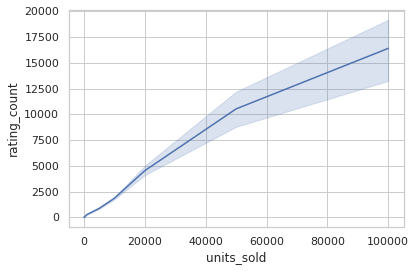

In [ ]:
sns.lineplot(df['units_sold'], df['rating_count'])

**Units_sold - Rating**

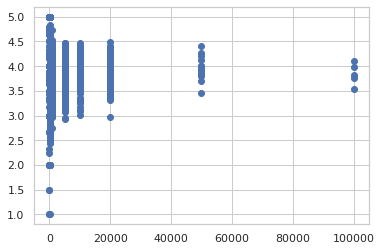

In [ ]:
plt.scatter(df['units_sold'], df['rating'])

As units_sold increases, rating average gets into a more consistent point. So, to make inferences from the data, it might an important point that size of data is at a certain point.

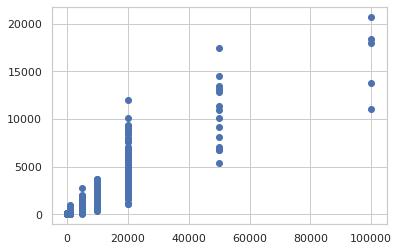

In [ ]:
plt.scatter(df['units_sold'], df['rating_count'])

As we can expect, as the product is sold more, the rating count increases.

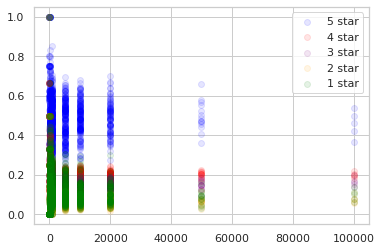

In [ ]:
plt.scatter(df['units_sold'], df['rating_five_count'], alpha = 0.1, color = 'blue', label = '5 star')
plt.scatter(df['units_sold'], df['rating_four_count'], alpha = 0.1, color = 'red', label = '4 star')
plt.scatter(df['units_sold'], df['rating_three_count'], alpha = 0.1, color = 'purple', label = '3 star')
plt.scatter(df['units_sold'], df['rating_two_count'], alpha = 0.1, color = 'orange', label = '2 star')
plt.scatter(df['units_sold'], df['rating_one_count'], alpha = 0.1, color = 'green', label = '1 star')
plt.legend(loc="upper right")

**Uses_ad_boosts**

In [ ]:
ad_yes = df[df['uses_ad_boosts'] == 1]
ad_no = df[df['uses_ad_boosts'] == 0]

In [ ]:
len(ad_yes)

628

In [ ]:
len(ad_no)

799

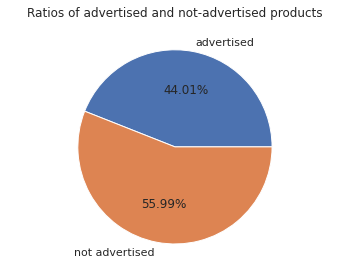

In [ ]:
my_data = [len(ad_yes), len(ad_no)]
my_labels = 'advertised','not advertised'
plt.pie(my_data,labels=my_labels,autopct='%1.2f%%')
plt.title('Ratios of advertised and not-advertised products', pad=21)
plt.axis('equal')
plt.show()

In [ ]:
stats.ttest_ind(ad_yes['units_sold'], ad_no['units_sold'])

Ttest_indResult(statistic=-0.9389910785667085, pvalue=0.34789445244967443)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Selling Amounts with and without Advertisement')

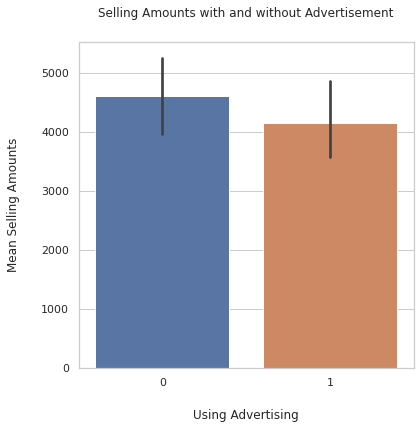

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(df['uses_ad_boosts'], df['units_sold'])
plt.xlabel('Using Advertising',labelpad=21)
plt.ylabel('Mean Selling Amounts',labelpad=21)
plt.title('Selling Amounts with and without Advertisement',pad=25)

In [ ]:
print(ad_yes['units_sold'].mean(),"\n", ad_no['units_sold'].mean())

4161.751592356688 
 4618.046307884856


In [ ]:
stats.ttest_ind(ad_yes['price'], ad_no['price'])

Ttest_indResult(statistic=-3.198640405021744, pvalue=0.0014111464962275916)

In [ ]:
print(ad_yes['price'].mean(), ad_no['price'].mean())

8.022515923566882 8.684906132665834


In [ ]:
stats.ttest_ind(ad_yes['retail_price'], ad_no['retail_price'])

Ttest_indResult(statistic=-0.8912115569607203, pvalue=0.3729661347589578)

In [ ]:
stats.ttest_ind(ad_yes['rating'], ad_no['rating'])

Ttest_indResult(statistic=-1.90456596384967, pvalue=0.05703770323693377)

In [ ]:
print(ad_yes['rating'].mean(), ad_no['rating'].mean())

3.754888535031849 3.803166458072592


In [ ]:
price = pd.qcut(df['price'], 5)
df.pivot_table('units_sold', ['uses_ad_boosts',price])

units_sold
uses_ad_boosts price                     
0              (0.999, 5.65]  5262.809917
               (5.65, 7.0]    5164.020619
               (7.0, 8.0]     4518.109677
               (8.0, 11.0]    5183.034884
               (11.0, 49.0]   2926.178344
1              (0.999, 5.65]  3150.887574
               (5.65, 7.0]    4507.758621
               (7.0, 8.0]     5719.905660
               (8.0, 11.0]    3913.157895
               (11.0, 49.0]   4148.269231

In [ ]:
ad_yes[ad_yes['price'] >= 8]['units_sold'].mean()

4542.798833819242

In [ ]:
ad_no[ad_no['price'] >= 8]['units_sold'].mean()

4238.014462809917

In [ ]:
stats.ttest_ind(ad_yes[ad_yes['price'] >= 8]['units_sold'], ad_no[ad_no['price'] >= 8]['units_sold'])

Ttest_indResult(statistic=0.5714279854175546, pvalue=0.5678652001410529)

In [ ]:
retail_price = pd.qcut(df['retail_price'], 5)
df.pivot_table('units_sold', ['uses_ad_boosts',retail_price])

units_sold
uses_ad_boosts retail_price              
0              (0.999, 6.0]   5269.570552
               (6.0, 8.0]     4672.173913
               (8.0, 12.0]    3536.419162
               (12.0, 34.0]   4442.748538
               (34.0, 252.0]  5223.918750
1              (0.999, 6.0]   3684.730539
               (6.0, 8.0]     5891.896552
               (8.0, 12.0]    4244.485981
               (12.0, 34.0]   3732.136752
               (34.0, 252.0]  3503.719008

In [ ]:
stats.ttest_ind(ad_yes[ad_yes['retail_price'] >= 8]['units_sold'], ad_no[ad_no['retail_price'] >= 8]['units_sold'])

Ttest_indResult(statistic=-0.7748038961092029, pvalue=0.4386527024020016)

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    print(lower_bound, upper_bound)

remove_outlier_IQR(df['price'])

-1.8499999999999988 18.71


In [ ]:
df_final = df[~((df['price'] < -1.85) | (df['price'] > 18.71))]

In [ ]:
ad_yes = df_final[df_final['uses_ad_boosts'] == 1]
ad_no = df_final[df_final['uses_ad_boosts'] == 0]

In [ ]:
stats.ttest_ind(ad_yes['units_sold'], ad_no['units_sold'])

Ttest_indResult(statistic=-0.9775857687326921, pvalue=0.32844716973340893)

In [ ]:
print(ad_yes['price'].mean(), ad_no['price'].mean())

7.77980551053485 8.55767969735183


While the expectation is for the products that advertise to reach higher sales figures, we see that it does not seem to have made a significant difference despite the advertisement. The results is similar for all price ranges. In addition, we do not observe a significant difference between the prices and ratings of advertised and non-advertised products. In fact, the average price of the advertised products is lower. Moreover, advertised products are rated lower than non-advertised products. The reason why it did not make this difference may be the low quality of products, because customers using the Wish site complained about poor quality or counterfeit goods. They may have given extra advertising to increase their sales. 

Besides, the products with ad are almost half of the products in data. So, the fact that there are so many advertised products may cause lose advertisement's effect. 

**Shipping price**

In [ ]:
round(df.pivot_table(['units_sold'],'shipping_option_price'))

,units_sold
shipping_option_price,
1,4821.0
2,4425.0
3,4500.0
4,3166.0
5,2809.0
6,4650.0
7,75.0
12,100.0


In [ ]:
round(df.pivot_table(['units_sold','price','retail_price'],'shipping_option_price'))

,price,retail_price,units_sold
shipping_option_price,,,
1,4.0,11.0,4821.0
2,7.0,21.0,4425.0
3,10.0,29.0,4500.0
4,15.0,44.0,3166.0
5,17.0,44.0,2809.0
6,20.0,37.0,4650.0
7,22.0,59.0,75.0
12,49.0,42.0,100.0


Text(0, 0.5, 'Selling Amount')

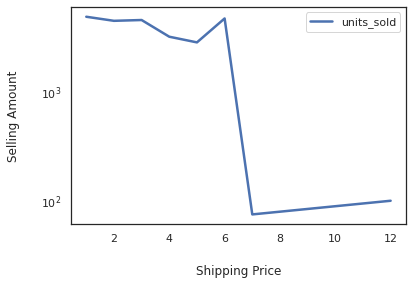

In [ ]:
sns.set_style('white')
df.pivot_table('units_sold','shipping_option_price').plot(linewidth=2.5)
plt.yscale('log')
plt.xlabel('Shipping Price', labelpad=21)
plt.ylabel('Selling Amount', labelpad=21)

People always prefer paying less shipping charges we can see that most selling products has low shipping charges

**Shipping Countries**

In [ ]:
cntry_ship = pd.cut(df['countries_shipped_to'], [10,20,30,40,50,60,70,80,90])
df.pivot_table('units_sold',cntry_ship)

,units_sold
countries_shipped_to,
"(10, 20]",4067.696970
"(20, 30]",2694.325581
"(30, 40]",5051.710526
"(40, 50]",4823.214286
"(50, 60]",4954.727273
"(60, 70]",1838.562500
"(70, 80]",5712.500000
"(80, 90]",2265.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



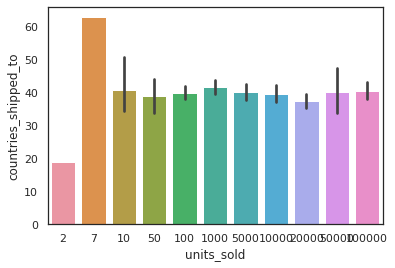

In [ ]:
sns.barplot(df['units_sold'], df['countries_shipped_to'])

There is no significant difference among selling rates with different number of shhiping countries. The reason why is not might be that the products in this data might be global enough to appear in France. So, we cannot observe that.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



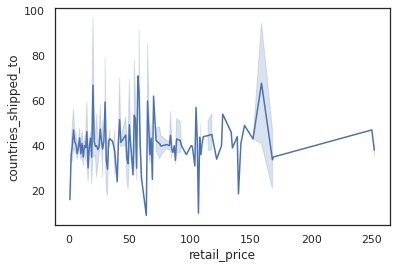

In [ ]:
sns.lineplot(df['retail_price'], df['countries_shipped_to'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



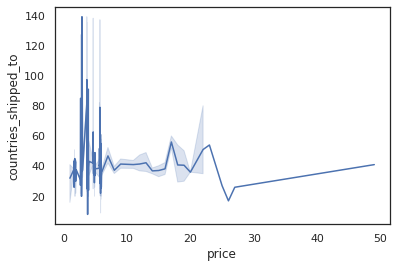

In [ ]:
sns.lineplot(df['price'], df['countries_shipped_to'])

The more the item sold, the more rating count.

**Badges**

In [ ]:
len(df[df['badge_product_quality'] == 1])

104

In [ ]:
len(df[df['badge_product_quality'] == 0])

1323

In [ ]:
len(df[df['badges_count'] == 2])

11

In [ ]:
stats.ttest_ind(df[df['badge_product_quality'] == 1]['units_sold'], df[df['badge_product_quality'] == 0]['units_sold'])

Ttest_indResult(statistic=2.8764120950224004, pvalue=0.00408210476492013)

In [ ]:
df[df['badge_product_quality'] == 1]['units_sold'].mean()

6885.576923076923

In [ ]:
df[df['badge_product_quality'] == 0]['units_sold'].mean()

4223.2040816326535

Merchants with product quality badge sold significantly more than merchants without the badge.

**Local Products**

In [ ]:
round(df.pivot_table('units_sold','badge_local_product'))

,units_sold
badge_local_product,
0,4433.0
1,3496.0


Text(0, 0.5, 'Mean Selling Amount')

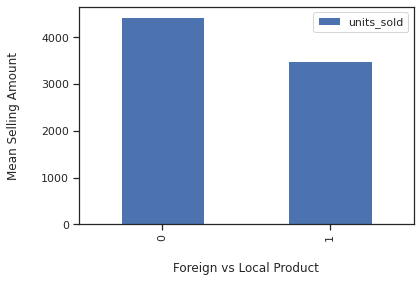

In [ ]:
sns.set_style('ticks')
df.pivot_table('units_sold','badge_local_product').plot(kind='bar')
plt.xlabel('Foreign vs Local Product', labelpad=21)
plt.ylabel('Mean Selling Amount', labelpad=21)

In [ ]:
stats.ttest_ind(df[df['badge_local_product'] == 1]['badge_fast_shipping'], df[df['badge_local_product'] == 0]['badge_fast_shipping'])

Ttest_indResult(statistic=13.522824026726823, pvalue=2.720178180968697e-39)

In [ ]:
df[df['badge_local_product'] == 1]['badge_fast_shipping'].mean()

0.2916666666666667

In [ ]:
df[df['badge_local_product'] == 0]['badge_fast_shipping'].mean()

0.007127583749109052

Local products have significantly higher rate of fast shipping than other products

In [ ]:
stats.ttest_ind(df[df['badge_local_product'] == 1]['badge_product_quality'], df[df['badge_local_product'] == 0]['badge_product_quality'])

Ttest_indResult(statistic=1.7833476424612724, pvalue=0.07474251134025707)

In [ ]:
df[df['badge_local_product'] == 1]['badge_product_quality'].mean()

0.16666666666666666

In [ ]:
df[df['badge_local_product'] == 0]['badge_product_quality'].mean()

0.07127583749109052

Local products tend to have product quality badge more, compared to other products

In [ ]:
stats.ttest_ind(df[df['badge_local_product'] == 1]['price'], df[df['badge_local_product'] == 0]['price'])

Ttest_indResult(statistic=1.8976485831096899, pvalue=0.057944345277317594)

In [ ]:
df[df['badge_local_product'] == 1]['price'].mean()

9.888333333333334

In [ ]:
df[df['badge_local_product'] == 0]['price'].mean()

8.367826086956509

In [ ]:
stats.ttest_ind(df[df['badge_local_product'] == 1]['retail_price'], df[df['badge_local_product'] == 0]['retail_price'])

Ttest_indResult(statistic=1.2642253534832897, pvalue=0.20635589731643006)

In [ ]:
df.pivot_table(['rating_five_count','rating_four_count'], 'badge_local_product', aggfunc='mean')

,rating_five_count,rating_four_count
badge_local_product,,
0,0.465317,0.187406
1,0.505868,0.157339


In [ ]:
df.pivot_table('rating','badge_local_product')

,rating
badge_local_product,
0,3.781497
1,3.806667


In [ ]:
stats.ttest_ind(df[df['badge_local_product'] == 1]['rating'], df[df['badge_local_product'] == 0]['rating'])

Ttest_indResult(statistic=0.25690214725909877, pvalue=0.7972913996237818)

In [ ]:
df.pivot_table('shipping_is_express','badge_local_product')

,shipping_is_express
badge_local_product,
0,0.000713
1,0.041667


In [ ]:
stats.ttest_ind(df[df['badge_local_product'] == 1]['shipping_is_express'], df[df['badge_local_product'] == 0]['shipping_is_express'])

Ttest_indResult(statistic=5.367363332930302, pvalue=9.315510092845185e-08)

It seems like there is no particular difference between local products in terms of rating, and prices. Besides, local products are shipped faster than imported products. When we look at product quality badge, they even have more badges than foreign products. Even though imported products are sold more now, in the long run, French people may gravitate to local products. 

However, there is no significant difference for retail prices.

**Product Size**

In [ ]:
df.pivot_table('units_sold','product_variation_size_id')

,units_sold
product_variation_size_id,
L,5946.078431
M,7045.728205
OTHER,3076.867470
S,4922.022082
XL,8100.000000
XS,2679.788520
XXL,2250.526316
XXS,1992.527473
XXXS,250.000000


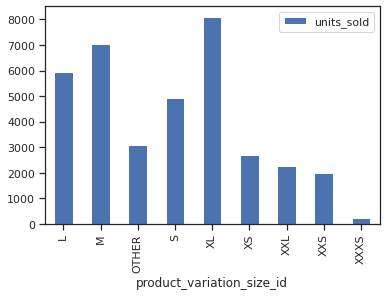

In [ ]:
df.pivot_table('units_sold','product_variation_size_id').plot(kind='bar')

Although there are more products with small sizes that are shown in search, costumers prefer clothes with XL, L, and M sizes. Search results does not totaly fit with costumer expectations.

In [ ]:
df.pivot_table('units_sold','merchant_rating',aggfunc='sum')

,units_sold
merchant_rating,
2.941176,100
3.000000,100
3.034483,100
3.038961,100
3.186047,200
...,...
4.471018,5000
4.484397,100
4.501472,10


In [ ]:
merch_rate = pd.cut(df['merchant_rating'], [3.75, 4, 4.25, 4.5])
sold_unit = pd.qcut(df['units_sold'], 2)
df.pivot_table(['units_sold','price'], merch_rate, aggfunc={'units_sold':sum,'price':'mean'})

,price,units_sold
merchant_rating,,
"(3.75, 4.0]",8.171052,1683612
"(4.0, 4.25]",8.408372,3742907
"(4.25, 4.5]",8.896352,822610


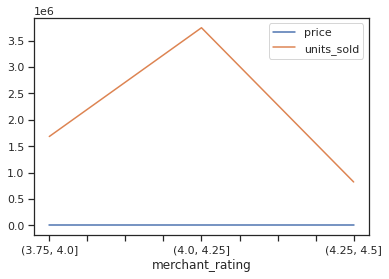

In [ ]:
df.pivot_table(['units_sold','price'], merch_rate, aggfunc={'units_sold':sum,'price':'mean'}).plot()

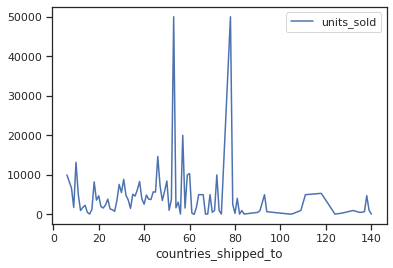

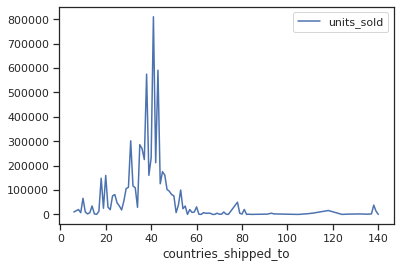

In [ ]:
df.pivot_table('units_sold', 'countries_shipped_to', aggfunc= 'mean').plot()
df.pivot_table('units_sold', 'countries_shipped_to', aggfunc= 'sum').plot()

After some point, there is a tremendous decrease in units_sold. Trying to sell products to more countries may lead to some problems such as customs and cargo time increase, and therefore consumers may have turned to other sellers.

High price ==> less units sold
* There are some cases where the price is low still the units sold are below average, possible reasons the product might not be upto the mark as per the buyers or there are some other factors affecting the price we haven't touched yet
* median of units sold is 1000, by this we can consider that products with units sold below 1000 (inclusive) were below average and products with units sold are very successfull. # It totally depends on your business goals which price range you want to focus on.

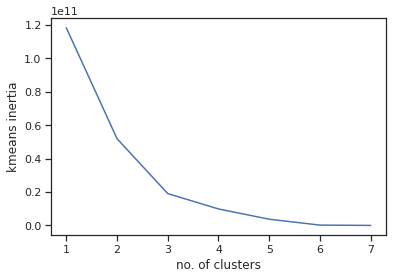

In [ ]:
from sklearn.cluster import KMeans

clusters = {}
for i in range(1,8):
    kmeans = KMeans(n_clusters=i).fit(df[['units_sold']])
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()));
plt.xlabel('no. of clusters');
plt.ylabel('kmeans inertia');

Most of the top selling products seems be concentrated to the left where the price difference is much significant

In [ ]:
df.groupby(['uses_ad_boosts'])['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
uses_ad_boosts,,,,,,,,
0,799.0,4618.046308,9570.782812,2.0,100.0,1000.0,5000.0,100000.0
1,628.0,4161.751592,8492.911677,10.0,100.0,1000.0,5000.0,100000.0


Consider these two groups of products one uses ad boost other dosen't

* There is very small difference between the means of the two groups
* Does using ad boost results in more success of products
* How big the difference is bwetween these two two groups?
* Is the effect statistically significant?

In [ ]:
import plotly.graph_objects as go
rating_cols=['rating_count','rating_five_count','rating_four_count',
             'rating_three_count','rating_two_count','rating_one_count']
ratings_data=df[rating_cols+['uses_ad_boosts']]

ratings_data.groupby('uses_ad_boosts').describe()
fig = go.Figure()
for col in rating_cols:
    fig.add_trace(go.Box(x=ratings_data['uses_ad_boosts'],
                         y=ratings_data[col],
                         name=col,
                         boxmean=True,
                         boxpoints=False))
fig.update_traces()
fig.update_layout(boxmode='group',
                  title='Relations between ad boosts and rating',
                  xaxis = dict(
                  tickvals = [0,1],
                  ticktext = ['Without add boosts','With add boosts']))
fig.show()

By dividing the data into two groups of "with" and "without add boosts", we can see that surprisingly, products without add boosts gain higher number of ratings on average, the same goes for number of 5, 4, 3, 2, 1-star ratings.

In [ ]:
def make_clusters(df,column):
    clusters = {}
    for i in range(1,8):
        kmeans = KMeans(n_clusters=i).fit(df[[column]])
        clusters[i] = kmeans.inertia_

    plt.plot(list(clusters.keys()), list(clusters.values()));
    plt.title(f'{column} clusters')
    plt.xlabel('no. of clusters');
    plt.ylabel('kmeans inertia'); 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



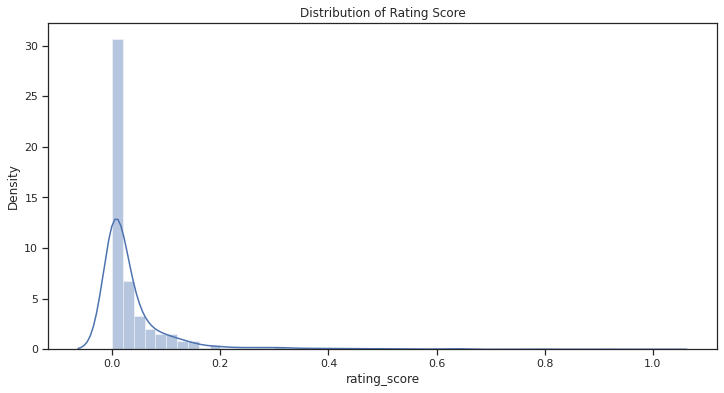

In [ ]:
df['rating_score'] = df['rating']*df['rating_count']
df['rating_score'] =df['rating_score']/df['rating_score'].max()
plt.figure(figsize=(12,6))
sns.distplot(df['rating_score']);
plt.title('Distribution of Rating Score');

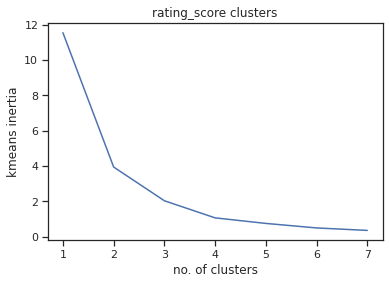

In [ ]:
make_clusters(df,'rating_score')

* With this overall score we have identified the groups of top selling, most liked products which are the ones generating high revenue and products performing below average
* There 213 successfull products with range of units sold from 10K to 100K at a mean price of 8.45
* In the other cluster the mean price is 8.34 but mean units sold are much low
another thing to notice is that people prefer a reasonable price as in successfull cluster the max price is 19, products in this cluster must be worth the price.

In [ ]:
badges_column = ['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

In [ ]:
df[df['badges_count'] != 0][badges_column]

,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping
27,1,0,1,0
31,1,0,1,0
35,1,0,1,0
39,1,0,1,0
40,1,0,1,0
...,...,...,...,...
1529,1,0,1,0
1545,1,0,1,0
1550,1,1,0,0
1556,1,1,0,0


Almost 50% of those who are successful have badges, especially the product quality badge.


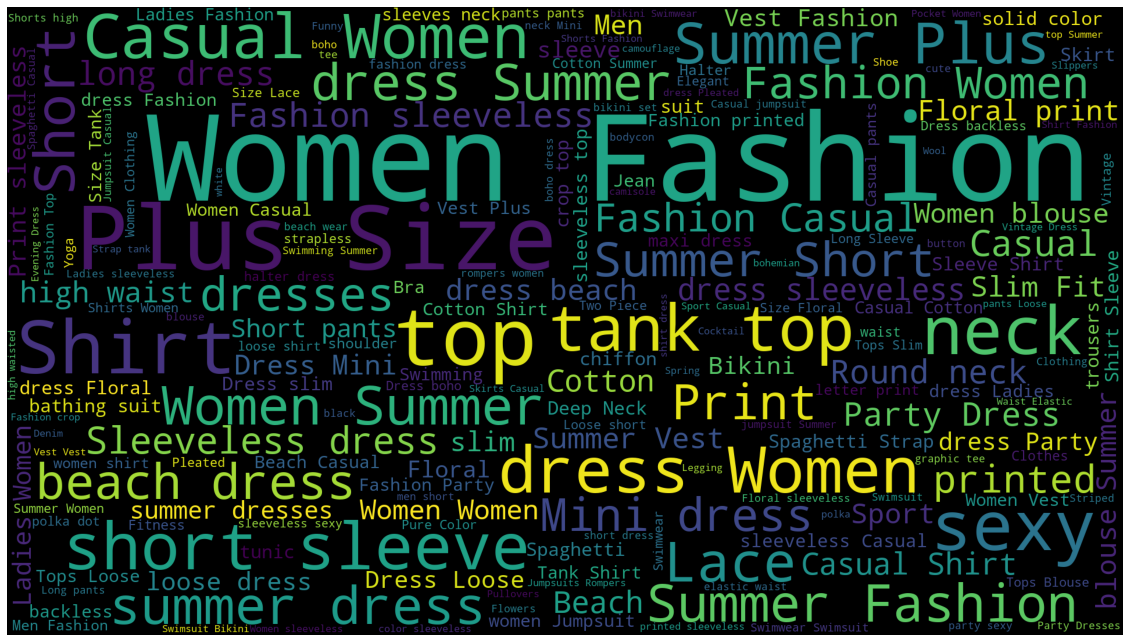

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,35))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.tags))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [ ]:
def pr_units(item):
    if item == 10 \
    or item == 50 \
    or item == 100 \
    or item == 1000 \
    or item == 5000 \
    or item == 10000 \
    or item == 20000 \
    or item == 50000 \
    or item == 100000:
        return item
    else:
        return 10

df['units_sold'] = df['units_sold'].apply(pr_units)
pr_unit = df['units_sold'].value_counts()
pr_unit

100       460
1000      384
5000      210
10000     168
20000      97
50         63
10         26
50000      14
100000      5
Name: units_sold, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



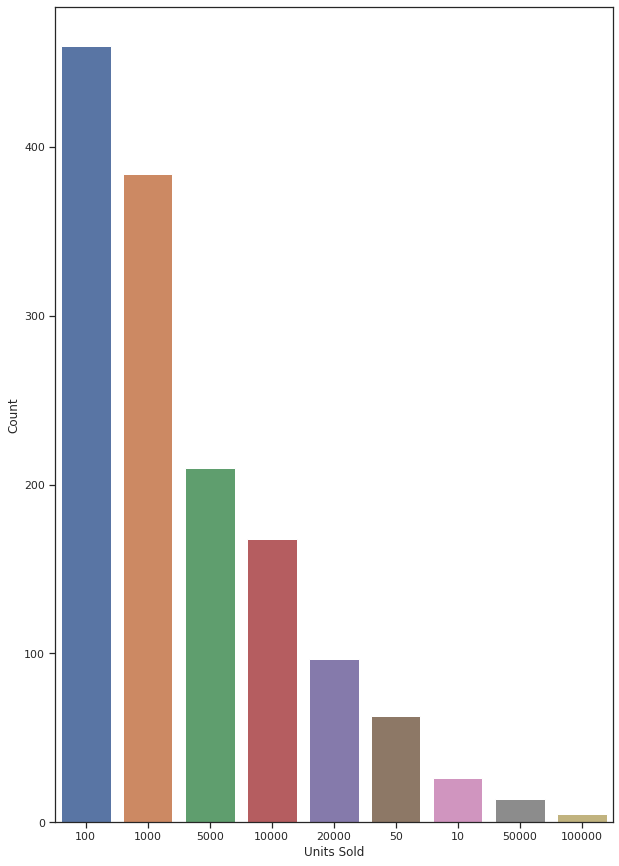

In [ ]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('units_sold',
              data = df,
              order = df['units_sold'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()

Merchant comments

In [ ]:
df['merchant_info_subtitle']

0                             (568 notes)
1       83 % avis positifs (17,752 notes)
2          86 % avis positifs (295 notes)
3                          (23,832 notes)
4       85 % avis positifs (14,482 notes)
                      ...                
1568     90 % avis positifs (5,316 notes)
1569                        (4,435 notes)
1570       86 % avis positifs (210 notes)
1571        77 % avis positifs (31 notes)
1572     90 % avis positifs (7,023 notes)
Name: merchant_info_subtitle, Length: 1427, dtype: object

# 7- SQL

https://colab.research.google.com/drive/17RGcLqI12g6NjO8ajgoL_hLn7wjXX3Nm?usp=sharing

# 8- Final Recommendation

1- has_urgency_banner --> Further research needs to be done to discover the effects of having urgency banner. A/B testing might be a good start to make inferences.

2- has_urgency_text --> What writes in the urgency banner also might have an influence on customers. Further studies can reveal the effect of urgency texts with different content (limited quantity, last 3 product, running out etc.)

3- merchant_info_subtitle --> Does the number of positive comments make an influence on customers? Are they prefer to buy more than the merchant with less positive comments?

4- tags --> Are tags helpful to find the desired product? How do tags affect customers' ideas about the product?

5- product_size_id --> It might be good to develop a format for sizes to give customers a better understanding about the products' sizes. This way, customer can make healthier choices.

6- Developing a machine-learning algorithm to predict the sales of a new product of a merchant